# MediaImageRecorder
A [MediaImageRecorder](api.rst#ipywebrtc.webrtc.MediaImageRecorder) allows you to record a screenshot from any stream object, e.g. from:
 
 * [VideoStream](api.rst#ipywebrtc.webrtc.VideoStream)
 * [WidgetStream](api.rst#ipywebrtc.webrtc.WidgetStream)
 * [CameraStream](api.rst#ipywebrtc.webrtc.CameraStream)

In [1]:
import ipywidgets as widgets
from ipywebrtc import MediaImageRecorder, VideoStream

In [2]:
video = VideoStream.from_url('ipyvolume.mp4')
video

VideoStream(format='url', value=b'ipyvolume.mp4')

Using the image recorder, you can take screenshot of the stream clicking the camera button

In [3]:
image_recorder = MediaImageRecorder(stream=video)
image_recorder

MediaImageRecorder(image=Image(value=b''), stream=VideoStream(format='url', value=b'ipyvolume.mp4'))

Or do it, programatically:

In [4]:
image_recorder.grab()

The data is PNG encoded (by default), so we show how to use PIL to read in the data

In [5]:
import PIL.Image
import PIL.ImageFilter
import io
im = PIL.Image.open(io.BytesIO(image_recorder.image.value))

PIL Images display by default as image in the notebook. Calling the filter methods returns a new image which gets displayed directly.

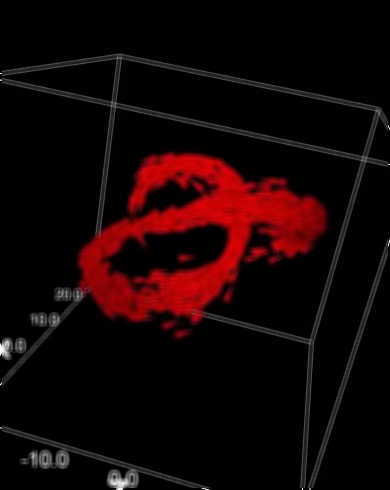

In [6]:
im.filter(PIL.ImageFilter.BLUR)

## Example with scikit image
We first convert the png encoded data to raw pixel values (as a numpy array).

In [7]:
import numpy as np
im_array = np.array(im)
im_array

array([[[  2,   1,   2, 255],
        [  2,   1,   2, 255],
        [  2,   1,   2, 255],
        ..., 
        [  3,   2,   3, 255],
        [  3,   2,   3, 255],
        [  3,   2,   3, 255]],

       [[  2,   1,   2, 255],
        [  2,   1,   2, 255],
        [  2,   1,   2, 255],
        ..., 
        [  2,   1,   2, 255],
        [  2,   1,   2, 255],
        [  2,   1,   2, 255]],

       [[  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        ..., 
        [  2,   1,   2, 255],
        [  2,   1,   2, 255],
        [  2,   1,   2, 255]],

       ..., 
       [[  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        ..., 
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255]],

       [[  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        ..., 
        [  1,   0,   1, 255],
        [  1,   0,   1, 255],
        [  1,   0,   1, 255]],

       

Now we can do easy manipulatios, such as reordering the channels (red, green, blue, alpha)

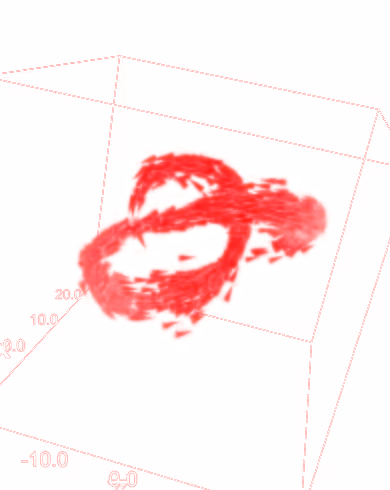

In [8]:
PIL.Image.fromarray(im_array[...,::-1])

Or build a slightly more sophisticated example using scikit-image (run this notebook with a live kernel, such as mybinder for this to work)

In [9]:
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.color import rgb2gray
from skimage.color.adapt_rgb import adapt_rgb, each_channel, hsv_value
from skimage import filters


image = widgets.Image()

filter_options = [('roberts', roberts), ('sobel', sobel), ('scharr', scharr), ('prewitt', prewitt)]
filter_widget = widgets.ToggleButtons(options=filter_options)

def update_image(change):
    # turn into nparray
    im_in = PIL.Image.open(io.BytesIO(image_recorder.image.value))
    im_array = np.array(im_in)[...,:3] # no alpha
    
    # filter
    filter_function = filter_widget.value
    im_array_edges = adapt_rgb(each_channel)(filter_function)(im_array)
    im_array_edges = ((1-im_array_edges) * 255).astype(np.uint8)
    im_out = PIL.Image.fromarray(im_array_edges)
    
    # store in image widget
    f = io.BytesIO()
    im_out.save(f, format='png')
    image.value = f.getvalue()

image_recorder.image.observe(update_image, 'value')
filter_widget.observe(update_image, 'value')
widgets.jslink((image_recorder.image, 'width'), (image, 'width'))
widgets.jslink((image_recorder.image, 'height'), (image, 'height'))
widgets.VBox([filter_widget, video, widgets.HBox([image_recorder, image]), ])

In [10]:
image_recorder.grab()